In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import Compose, PILToTensor, ToTensor
import PIL
import torch
import torchvision as torchvision

from dataset import CropSegmentationDataset
from am4ip.new_trainer import BaselineTrainer

from torch.utils.data import DataLoader

In [2]:
batch_size = 6
lr = 1e-2
epochs = 105

In [3]:
transform = Compose([lambda z: z.resize((256,256),PIL.Image.BILINEAR), 
                     PILToTensor(),
                     lambda z: z.to(dtype=torch.float32) / 127.5 - 1  # Normalize between -1 and 1
                     ])

target_transform = Compose([lambda z: z.resize((256,256),PIL.Image.NEAREST),
                            PILToTensor(),
                            lambda z : z.to(dtype=torch.int64).squeeze(0)
                     ])

In [4]:
dataset_train = CropSegmentationDataset(set_type="train", transform=transform, target_transform = target_transform, remove_small_items = True, merge_small_items=False)
dataset_test = CropSegmentationDataset(set_type="test", transform = transform, merge_small_items=False )
dataset_val = CropSegmentationDataset(set_type="val", target_transform = target_transform, transform = transform, remove_small_items = True, merge_small_items=False)

In [5]:
print("len of dataset_train = ", dataset_train.__len__())
print("len of dataset_test = ", dataset_test.__len__())
print("len of dataset_val = ", dataset_val.__len__())

len of dataset_train =  1407
len of dataset_test =  350
len of dataset_val =  422


In [6]:
dataset_train

In [7]:
t0 = dataset_val[0]

In [8]:
print(type(dataset_train))
print(type(dataset_train[0]))

print(type(dataset_test))
print(t0)

<class 'dataset.CropSegmentationDataset'>
<class 'tuple'>
<class 'dataset.CropSegmentationDataset'>
(tensor([[[ 0.4510,  0.5059,  0.4980,  ...,  0.2784,  0.2314, -0.1216],
         [ 0.0510,  0.2471,  0.5059,  ...,  0.0980,  0.1059, -0.0431],
         [-0.2392,  0.2314,  0.3333,  ..., -0.3412, -0.1137, -0.4118],
         ...,
         [ 0.0824, -0.5529,  0.0353,  ...,  0.1765, -0.0196,  0.1216],
         [ 0.1059, -0.2706,  0.1294,  ...,  0.1529,  0.1686,  0.3804],
         [ 0.3333,  0.2863,  0.1843,  ...,  0.1216,  0.4353,  0.2941]],

        [[ 0.1216,  0.1608,  0.1608,  ..., -0.0510, -0.0824, -0.4118],
         [-0.2471, -0.0824,  0.1686,  ..., -0.2314, -0.1843, -0.3255],
         [-0.5059, -0.0824, -0.0118,  ..., -0.5686, -0.3647, -0.5765],
         ...,
         [-0.1843, -0.6863, -0.2000,  ..., -0.1608, -0.3098, -0.1922],
         [-0.1843, -0.4980, -0.1608,  ..., -0.1843, -0.1373,  0.0667],
         [ 0.0275, -0.0039, -0.1216,  ..., -0.2078,  0.1294, -0.0196]],

        [[-0.20

In [9]:
t1 = dataset_train[620]

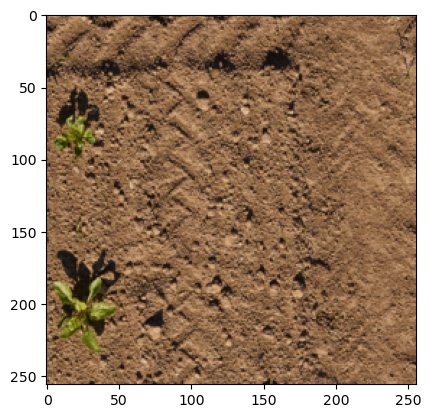

In [10]:
plt.imshow((t0[0].permute(1,2,0)+1) * 0.5)

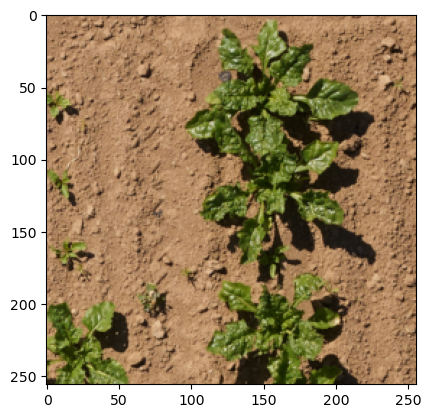

In [11]:
plt.imshow((t1[0].permute(1,2,0)+1) * 0.5)

In [12]:
print(t1[0])

tensor([[[ 0.5294,  0.4275,  0.2784,  ...,  0.5373,  0.5216,  0.5608],
         [ 0.4510,  0.4039,  0.5059,  ...,  0.4196,  0.4667,  0.5294],
         [ 0.4275,  0.2784,  0.4118,  ...,  0.5059,  0.3725,  0.5451],
         ...,
         [-0.6784, -0.6863, -0.6706,  ..., -0.0745,  0.3255,  0.3020],
         [-0.6706, -0.7255, -0.7176,  ...,  0.2314,  0.4824,  0.2471],
         [-0.6784, -0.7333, -0.7255,  ...,  0.3412,  0.3647,  0.4510]],

        [[ 0.2392,  0.0980, -0.0431,  ...,  0.2157,  0.1843,  0.2314],
         [ 0.1216,  0.0824,  0.2078,  ...,  0.0824,  0.1373,  0.2000],
         [ 0.0902, -0.0510,  0.0980,  ...,  0.1608,  0.0510,  0.2157],
         ...,
         [-0.7412, -0.7490, -0.7490,  ..., -0.3333,  0.0118, -0.0118],
         [-0.7333, -0.7882, -0.7804,  ..., -0.0745,  0.1608, -0.0510],
         [-0.7333, -0.7882, -0.7804,  ...,  0.0196,  0.0510,  0.1451]],

        [[-0.0588, -0.1765, -0.3020,  ..., -0.1059, -0.1373, -0.0902],
         [-0.1686, -0.2000, -0.0980,  ..., -0

In [13]:
print(t1[1])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [14]:
t1_1array = np.array(t1[1]).squeeze()

print(np.max(t1_1array))

2


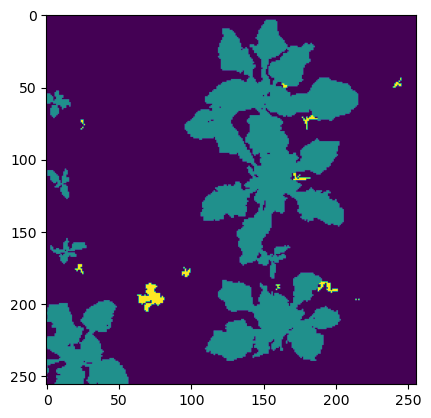

In [15]:
plt.imshow(t1_1array)

In [16]:
def target_pixel(img):
    img = np.array(img).squeeze()
    
    print(img.shape)
    

target_pixel(t1[1])

(256, 256)


In [17]:
def create_model(n):
    encoder = torch.nn.Sequential(
        torch.nn.Conv2d(3,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3)),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3)),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.MaxPool2d((2,2),2),
        
        torch.nn.Conv2d(64,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
    
        torch.nn.MaxPool2d((2,2),2),
    
        torch.nn.Conv2d(128,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU()
    )

    reconstruction = torch.nn.Sequential(
        torch.nn.Conv2d(3,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.MaxPool2d((2,2),2),
        
        torch.nn.Conv2d(64,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.MaxPool2d((2,2),2),
    
        torch.nn.Conv2d(128,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Upsample(scale_factor=2),
        
        torch.nn.Conv2d(256,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Upsample(scale_factor=2),
        
        torch.nn.Conv2d(128,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,n,(3,3), padding = 'same'),
    )

    return encoder, reconstruction

In [18]:
encoder, reconstruction = create_model(3)

In [19]:
model = reconstruction

In [20]:
loss = torch.nn.CrossEntropyLoss()

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [22]:
trainer = BaselineTrainer(model=model, loss = loss, optimizer=optimizer)

In [23]:
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)

In [24]:
history = trainer.fit(train_loader, val_loader, epoch=epochs)

Start epoch 1/105
Validation 71/71: loss = 0.030262287115861833
Start epoch 2/105
Validation 71/71: loss = 0.022659109111770357
Start epoch 3/105
Validation 71/71: loss = 0.022645921853016887
Start epoch 4/105
Validation 71/71: loss = 0.020023403781085785
Start epoch 5/105
Validation 71/71: loss = 0.018491958058111265
Start epoch 6/105
Validation 71/71: loss = 0.021725196797977874
Start epoch 7/105
Validation 71/71: loss = 0.022894104076942926
Start epoch 8/105
Validation 71/71: loss = 0.024430444660845776
Start epoch 9/105
Validation 71/71: loss = 0.019211414066786076
Start epoch 10/105
Validation 71/71: loss = 0.020223586072384476
Start epoch 11/105
Validation 71/71: loss = 0.020978542661268106
Start epoch 12/105
Validation 71/71: loss = 0.019270853198487575
Start epoch 13/105
Validation 71/71: loss = 0.018132414609770967
Start epoch 14/105
Validation 71/71: loss = 0.017026613846840993
Start epoch 15/105
Validation 71/71: loss = 0.016007629210050677
Start epoch 16/105
Validation 71/7

In [25]:
#trainer.fit(train_loader, val_loader, epoch=1)

In [44]:
type(history)

dict

In [45]:
import pickle

with open('history.pkl', 'wb') as file:
    pickle.dump(history, file)


In [46]:
with open('history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)


In [47]:
val_loss_history = loaded_history['val_loss']
val_accuracy_history = loaded_history['val_accuracy']
train_loss_history = loaded_history['train_loss']
train_accuracy_history = loaded_history['train_accuracy']

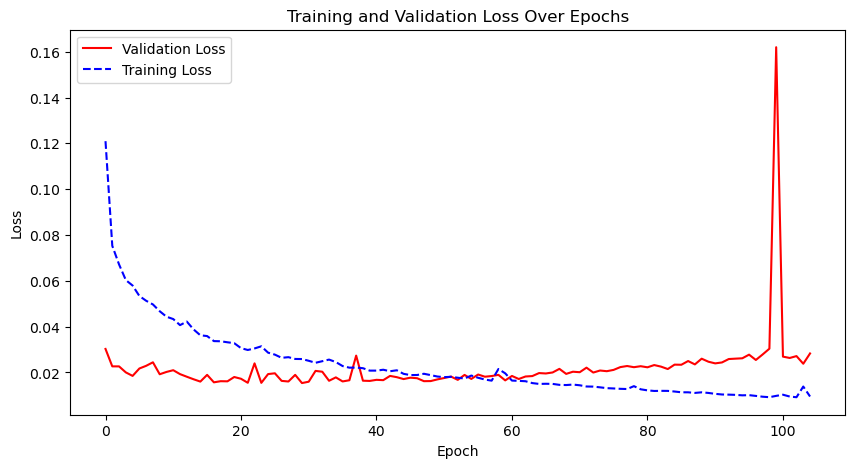

In [48]:
# Courbe de perte de validation
plt.figure(figsize=(10, 5))
plt.plot(val_loss_history, label='Validation Loss', color='red')
plt.plot(train_loss_history, label='Training Loss', color='blue', linestyle='dashed')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('loss_105.png')
plt.show()

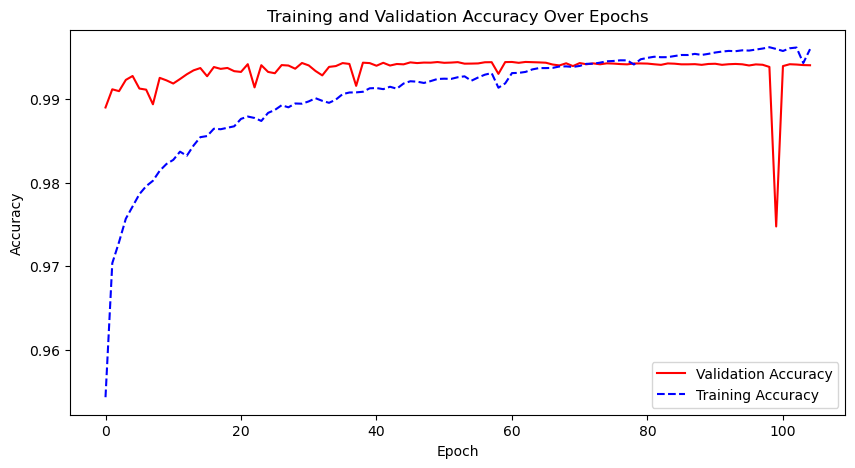

<Figure size 640x480 with 0 Axes>

In [41]:
# Courbe de précision de validation
plt.figure(figsize=(10, 5))
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue', linestyle='dashed')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('accuracy_105.png')
plt.show()

In [40]:
torch.save(model, 'recon105epoch.pt')

In [30]:
len(dataset_train)

1407

In [31]:
t0 = dataset_val[16]

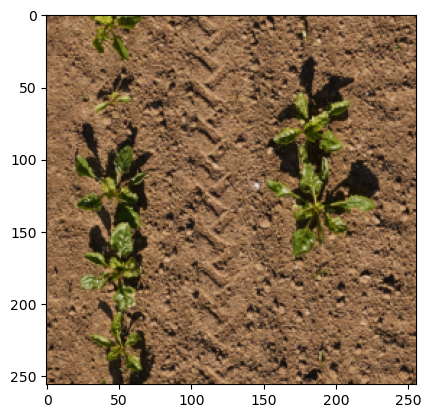

In [32]:
i_drone = (t0[0].permute(1,2,0)+1) * 0.5
plt.imshow(i_drone)

In [33]:
test = trainer.model.forward(t0[0].unsqueeze(0).cuda())

In [34]:
test.size()

torch.Size([1, 3, 256, 256])

In [35]:
test = test.cpu().detach()
test1 = test.squeeze(0)
i = torch.softmax(test1, 0)

In [36]:
print(i[:, 120, 120])

tensor([1.0000e+00, 2.2684e-07, 2.1095e-07])


In [37]:
print(np.sum(i[:, 120, 120].numpy()))

print(len(i))

1.0
3


In [38]:
i_merged = torch.stack([i[0], i[1], i[2]])
i_result = torch.argmax(i_merged, dim=0)

print(type(i[0]))
print(type(i[1]))
print(type(i[2]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


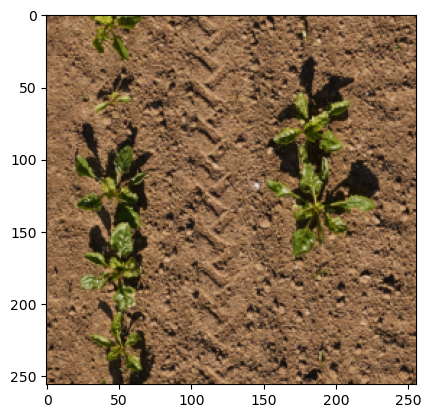

In [39]:
plt.imshow(i_drone)

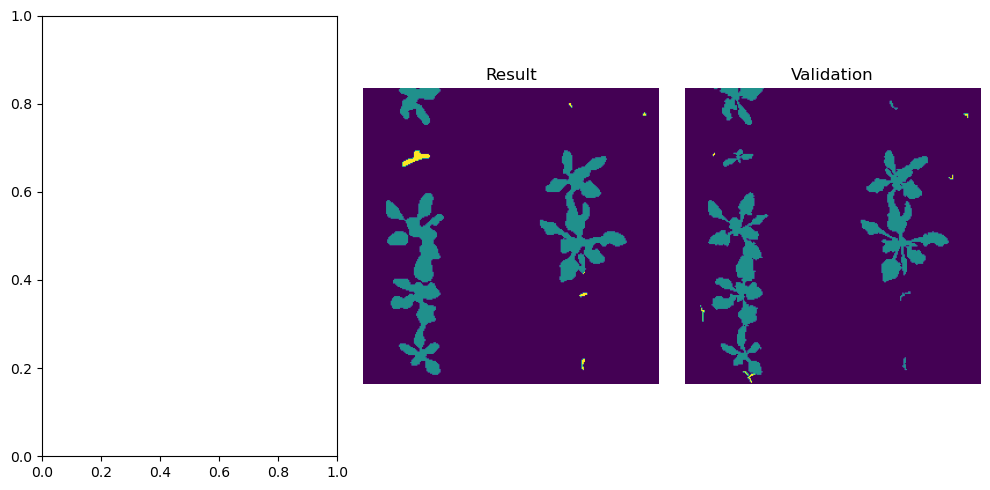

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  
axes[0].imshow(i_drone)
axes[0].set_title('Input image')
axes[0].axis('off')
axes[1].imshow(i_result)
axes[1].set_title('Result')
axes[1].axis('off')
axes[2].imshow(np.array(t0[1]).squeeze())
axes[2].set_title('Validation')
axes[2].axis('off')

plt.tight_layout()

plt.show()